<h2 id="exercises">Exercises</h2>
<p>For all of the datasets below, examine the data types of each column, ensure
that the dates are in the proper format, and set the dataframe's index to the
date column as appropriate.</p>
<p>For this exercise you'll need to install a library that will provide us access
to some more datasets:</p>
<div class="highlight"><pre><span></span>pip install vega_datasets
</pre></div>

<p>You can use this library like so:</p>


In [1]:
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [2]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

---


<p>Use the above dataset for the exercises below:</p>



In [36]:
from vega_datasets import data
df =data.sf_temps()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [38]:
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [39]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [40]:
df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00
...,...
2010-12-31 19:00:00,50.40
2010-12-31 20:00:00,49.90
2010-12-31 21:00:00,49.40


In [41]:
df.shape

(8759, 1)

<AxesSubplot:xlabel='date'>

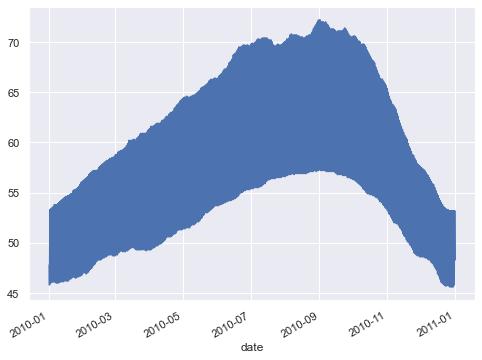

In [42]:
df.temp.plot()

1. Resample by the day and take the average temperature. Visualize the average
   temperature over time.


In [11]:
df.resample('1D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


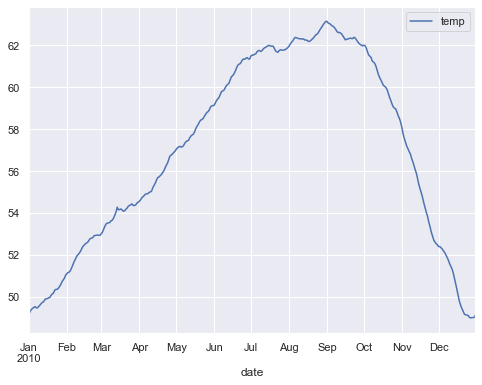

In [44]:
df.resample('1D').mean().plot();


2. Write the code necessary to visualize the minimum temperature over time.


<AxesSubplot:xlabel='date'>

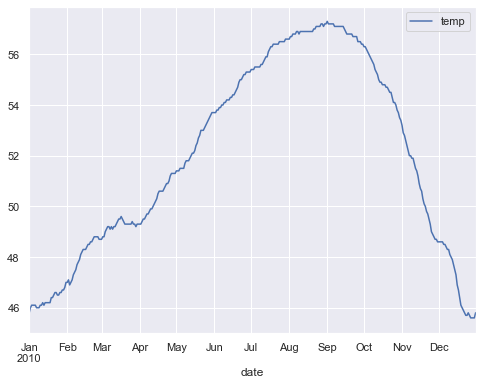

In [45]:
df.resample('D').min().plot()


3. Write the code necessary to visualize the maximum temperature over time.
   


<AxesSubplot:xlabel='date'>

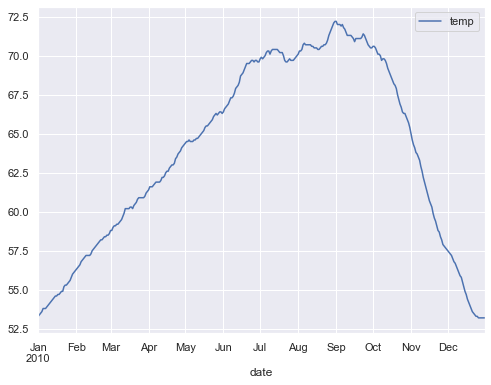

In [46]:
df.resample('D').max().plot()


4. Which month is the coldest, on average?


In [13]:
month =df.resample('M').mean()

In [15]:
month.head()

,temp
date,
2010-01-31,49.98
2010-02-28,52.24
2010-03-31,53.96
2010-04-30,55.63
2010-05-31,57.97


In [17]:
month.sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98


In [48]:
df.resample('M').mean().temp.sort_values()


date
2010-01-31   49.98
2010-12-31   50.50
2010-02-28   52.24
2010-03-31   53.96
2010-11-30   55.19
2010-04-30   55.63
2010-05-31   57.97
2010-10-31   60.25
2010-06-30   60.44
2010-07-31   61.77
2010-08-31   62.41
2010-09-30   62.49
Name: temp, dtype: float64

5.  Which month has the highest average temperature?
  


In [18]:
month.sort_values(by='temp', ascending=False).head(1)

,temp
date,
2010-09-30,62.49


In [51]:
df.temp.resample('M').mean().sort_values(ascending=False)


date
2010-09-30   62.49
2010-08-31   62.41
2010-07-31   61.77
2010-06-30   60.44
2010-10-31   60.25
2010-05-31   57.97
2010-04-30   55.63
2010-11-30   55.19
2010-03-31   53.96
2010-02-28   52.24
2010-12-31   50.50
2010-01-31   49.98
Name: temp, dtype: float64

6. Resample by the day and calculate the min and max temp for the day (Hint:
   <code>.agg(['min', 'max'])</code>). Use this resampled dataframe to calculate the change
   in temperature for the day. Which month has the highest daily temperature
   variability?
   


In [52]:
day = df.temp.resample('D').agg(['min', 'max'])

In [53]:
day.head()

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80


In [55]:
day['temp_swing']=day['max']-day['min']

In [58]:
day.sort_values(by='temp_swing', ascending=False)

,min,max,temp_swing
date,,,
2010-08-31,57.20,72.20,15.00
2010-09-01,57.30,72.20,14.90
2010-08-30,57.20,72.10,14.90
2010-08-29,57.10,71.90,14.80
2010-09-02,57.20,72.00,14.80
...,...,...,...
2010-12-25,45.80,53.30,7.50
2010-01-04,46.10,53.60,7.50
2010-12-31,45.80,53.20,7.40


In [62]:
day.resample('M').max().temp_swing.sort_values(ascending=False).head(1)


date
2010-08-31   15.00
Name: temp_swing, dtype: float64

In [24]:
#day['yesterday_temp']=day.temp.shift(1)

In [26]:
#day['daily_delta']=day.temp-day.yesterday_temp

In [27]:
day.head()

,temp,yesterday_temp,daily_delta
date,,,
2010-01-01,49.17,NaN,NaN
2010-01-02,49.30,49.17,0.13
2010-01-03,49.39,49.30,0.09
2010-01-04,49.45,49.39,0.05
2010-01-05,49.49,49.45,0.05


In [28]:
month = day.resample('M').mean()

In [31]:
month['abs_daily_delta']=abs(month.daily_delta)

In [32]:
month.head()

,temp,yesterday_temp,daily_delta,abs_daily_delta
date,,,,
2010-01-31,49.98,49.95,0.06,0.06
2010-02-28,52.24,52.18,0.07,0.07
2010-03-31,53.96,53.91,0.05,0.05
2010-04-30,55.63,55.55,0.08,0.08
2010-05-31,57.97,57.90,0.07,0.07


In [35]:
month.sort_values(by='abs_daily_delta', ascending=False).head()

,temp,yesterday_temp,daily_delta,abs_daily_delta
date,,,,
2010-11-30,55.19,55.38,-0.20,0.20
2010-10-31,60.25,60.37,-0.12,0.12
2010-12-31,50.50,50.61,-0.11,0.11
2010-04-30,55.63,55.55,0.08,0.08
2010-06-30,60.44,60.37,0.07,0.07


<strong>Bonus</strong>: Visualize the daily min, average, and max temperature over time on a
   single line plot, i.e. the min, average, and maximum temperature should be 3
   seperate lines.</li>
   


<AxesSubplot:xlabel='date'>

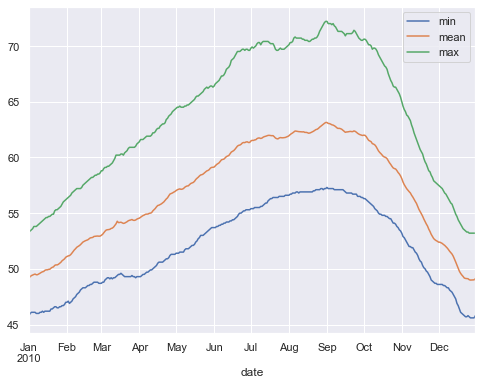

In [63]:
df.temp.resample('D').agg(['min', 'mean', 'max']).plot()


</ol>
<hr />



<div class="highlight"><pre><span></span><span class="kn">from</span> <span class="nn">vega_datasets</span> <span class="kn">import</span> <span class="n">data</span>
<span class="n">data</span><span class="o">.</span><span class="n">seattle_weather</span><span class="p">()</span>
</pre></div>

<p>Use the dataset to answer the following questions:</p>
<ul>


In [64]:
from vega_datasets import data
df = data.seattle_weather()

In [65]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [66]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [67]:
df = df.set_index('date').sort_index()


In [68]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


1. Which year and month combination has the highest amount of precipitation?


In [72]:
df.resample('M').sum().precipitation.sort_values(ascending=False).head()


date
2015-12-31   284.50
2014-03-31   240.00
2015-11-30   212.60
2012-11-30   210.50
2012-03-31   183.00
Name: precipitation, dtype: float64

2. Visualize the amount of monthly precipitation over time.


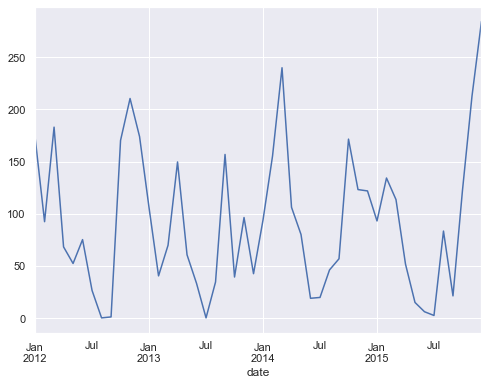

In [74]:
df.precipitation.resample('M').sum().plot();


3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


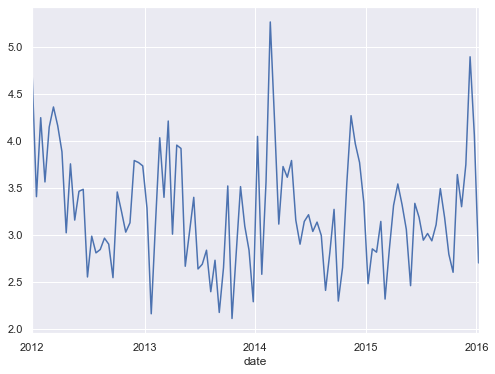

In [77]:
df.wind.resample('2W').mean().plot();


4. Which year-month combination is the windiest?


In [78]:
df.wind.resample('M').mean().sort_values(ascending=False).head()


date
2014-02-28   4.53
2015-12-31   4.34
2012-03-31   4.25
2014-11-30   3.98
2012-02-29   3.90
Name: wind, dtype: float64

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [79]:
df.weather.value_counts()


sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [82]:
df['sunny'] = df.weather == 'sun'
df.sample(25)


,precipitation,temp_max,temp_min,wind,weather,sunny
date,,,,,,
2014-12-05,3.00,12.80,6.70,3.10,fog,False
2013-01-28,7.90,6.10,3.30,3.20,rain,False
2014-10-17,3.30,16.70,11.70,3.00,fog,False
2012-09-19,0.00,23.90,11.70,1.90,drizzle,False
2014-10-26,1.50,12.80,7.80,5.00,fog,False
...,...,...,...,...,...,...
2012-10-01,0.00,23.30,8.90,3.00,sun,True
2014-12-24,5.30,7.20,3.90,1.80,fog,False
2014-01-28,8.90,11.10,6.10,1.60,fog,False


In [87]:
df.resample('Y').sunny.mean().sort_values(ascending=False)


date
2014-12-31   0.58
2013-12-31   0.56
2015-12-31   0.49
2012-12-31   0.32
Name: sunny, dtype: float64

6. In which month does it rain the most?


In [90]:
df['month'] = df.index.month
df.sample(25)


,precipitation,temp_max,temp_min,wind,weather,sunny,month
date,,,,,,,
2015-05-01,0.00,18.30,8.90,3.70,sun,True,5
2014-03-17,0.30,10.00,2.80,3.20,fog,False,3
2014-02-27,0.00,12.80,4.40,2.30,sun,True,2
2012-05-07,0.00,23.90,6.10,2.20,sun,True,5
2013-02-20,1.50,7.80,1.10,2.10,rain,False,2
...,...,...,...,...,...,...,...
2014-05-22,0.00,24.40,11.70,2.50,sun,True,5
2014-04-27,6.90,11.10,6.10,5.80,fog,False,4
2012-04-08,0.00,21.10,7.20,4.10,sun,True,4


In [91]:
df.groupby('month').precipitation.sum().sort_values(ascending=False).head()


month
11   642.50
12   622.70
3    606.20
10   503.40
1    466.00
Name: precipitation, dtype: float64

7. Which month has the most number of days with a non-zero amount of precipitation?


In [93]:
df['rain'] = df.precipitation > 0
df.sample(25)

,precipitation,temp_max,temp_min,wind,weather,sunny,month,rain
date,,,,,,,,
2013-02-15,0.00,13.30,5.00,2.40,drizzle,False,2,False
2014-05-19,0.00,21.10,10.00,2.20,sun,True,5,False
2014-07-05,0.00,24.40,13.30,2.20,fog,False,7,False
2012-12-24,0.30,5.60,2.80,2.80,rain,False,12,True
2014-04-22,14.20,12.20,5.00,4.20,fog,False,4,True
...,...,...,...,...,...,...,...,...
2013-03-28,2.00,16.10,8.30,1.30,rain,False,3,True
2012-02-01,13.50,8.90,3.30,2.70,rain,False,2,True
2014-06-29,0.00,20.60,12.80,3.20,sun,True,6,False


---

In [94]:
df.groupby('month').rain.mean().sort_values(ascending=False).head()


month
12   0.65
2    0.65
11   0.59
3    0.59
1    0.53
Name: rain, dtype: float64

---


<div class="highlight"><pre><span></span><span class="n">data</span><span class="o">.</span><span class="n">flights_20k</span><span class="p">()</span>
</pre></div>


In [96]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [97]:
df.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

In [98]:
df =df.set_index('date').sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB



1. Convert any negative delays to 0.


In [100]:
df.delay = np.where(df.delay < 0, 0, df.delay)

2. Which hour of the day has the highest average delay?


In [101]:
df['hour'] = df.index.hour

df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [102]:
df.groupby('hour').delay.mean().sort_values(ascending=False).head()


hour
3    302.50
1    170.00
0    127.92
23    65.35
22    32.70
Name: delay, dtype: float64

3. Does the day of the week make a difference in the delay amount?


In [103]:
df['weekday'] = df.index.day_name()
df.sample(10)

,delay,distance,origin,destination,hour,weekday
date,,,,,,
2001-03-01 08:05:00,0,325,BUR,OAK,8,Thursday
2001-03-29 17:54:00,0,1034,TPA,ISP,17,Thursday
2001-02-06 14:20:00,0,324,DAL,AMA,14,Tuesday
2001-01-26 06:40:00,0,670,HOU,BNA,6,Friday
2001-03-14 06:30:00,4,361,OAK,ONT,6,Wednesday
2001-01-29 13:30:00,3,307,MDW,CLE,13,Monday
2001-01-06 10:37:00,0,337,LAX,OAK,10,Saturday
2001-01-21 11:35:00,0,405,MDW,MCI,11,Sunday
2001-01-10 18:05:00,0,601,RNO,PHX,18,Wednesday


In [106]:
delay_day=df.groupby('weekday').delay.mean()
delay_day

weekday
Friday      17.76
Monday       7.17
Saturday     8.43
Sunday      10.41
Thursday    12.82
Tuesday      9.41
Wednesday   11.03
Name: delay, dtype: float64

In [117]:
df.groupby('weekday').delay.mean()

weekday
Friday      17.76
Monday       7.17
Saturday     8.43
Sunday      10.41
Thursday    12.82
Tuesday      9.41
Wednesday   11.03
Name: delay, dtype: float64

In [108]:
delay_day[0]

17.75759577278732

In [111]:
import scipy

In [113]:
delay_day[0]

17.75759577278732

In [114]:
#Would like an array of all observations by day to do statistical testing of differences

4. Does the month make a difference in the delay amount?


</ul>
<h3 id="bonus">Bonus</h3>
<div class="highlight"><pre><span></span><span class="kn">from</span> <span class="nn">vega_datasets</span> <span class="kn">import</span> <span class="n">data</span>
<span class="n">data</span><span class="o">.</span><span class="n">iowa_electricity</span><span class="p">()</span>
</pre></div>



1. For each row, calculate the percentage of the year's total that energy source provided.


2. Lineplot of generation over time, color by source.


3. Display the data as table where years are columns, and energy source is rows (Hint: <code>df.pivot_table</code>)


4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line.


5. Is the total generation increasing over time?
  - How would you control for increasing consumption over time when considering how much energy is coming from each source?
  - Express each number as a % of the year's total


---

1. Use the <code>sf_temps</code> dataset


2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use <code>pd.cut</code> or <code>pd.qcut</code> for this)


3. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.


4. Create pretty labels for time plots.


5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar



---
<p>Explore the <code>birdstrikes</code> dataset.</p>
<div class="highlight"><pre><span></span><span class="n">df</span> <span class="o">=</span> <span class="n">data</span><span class="o">.</span><span class="n">birdstrikes</span><span class="p">()</span>
</pre></div>

<div class="highlight"><pre><span></span>
</pre></div>